In [2]:
# import xml.etree.ElementTree as ET
# import csv

# # Charger le fichier XML
# tree = ET.parse("CRSANR5L16S2024O1N220.xml")
# root = tree.getroot()

# # Namespace (important pour trouver les balises)
# ns = {"ns": "http://schemas.assemblee-nationale.fr/referentiel"}

# # Extraire la date de la séance
# date_seance = root.find(".//ns:dateSeanceJour", ns).text.strip()

# # Stocker les résultats
# rows = []

# # Parcourir les points de l'ordre du jour pour trouver le contexte
# for point in root.findall(".//ns:point", ns):
#     sujet = point.find("ns:texte", ns)
#     sujet_texte = sujet.text.strip() if sujet is not None else ""

#     # Parcourir les paragraphes du point
#     for paragraphe in point.findall("ns:paragraphe", ns):
#         texte_elem = paragraphe.find("ns:texte", ns)
#         if texte_elem is None or not texte_elem.text:
#             continue  # sauter s'il n'y a pas de texte

#         # Infos générales
#         texte = ET.tostring(texte_elem, encoding="unicode", method="text").strip()
#         id_paragraphe = paragraphe.attrib.get("id_syceron", "")
#         ordre = paragraphe.attrib.get("ordre_absolu_seance", "")
#         code_grammaire = paragraphe.attrib.get("code_grammaire", "")
#         code_style = paragraphe.attrib.get("code_style", "")
#         code_parole = paragraphe.attrib.get("code_parole", "")

#         # Chercher l’orateur
#         orateur_elem = paragraphe.find(".//ns:orateur", ns)
#         if orateur_elem is not None:
#             nom = (
#                 orateur_elem.find("ns:nom", ns).text
#                 if orateur_elem.find("ns:nom", ns) is not None
#                 else ""
#             )
#             qualite = (
#                 orateur_elem.find("ns:qualite", ns).text
#                 if orateur_elem.find("ns:qualite", ns) is not None
#                 else ""
#             )
#             id_orateur = (
#                 orateur_elem.find("ns:id", ns).text
#                 if orateur_elem.find("ns:id", ns) is not None
#                 else ""
#             )
#         else:
#             nom = ""
#             qualite = ""
#             id_orateur = ""

#         rows.append(
#             {
#                 "Nom": nom,
#                 "Qualité": qualite,
#                 "ID Orateur": id_orateur,
#                 "Texte": texte,
#                 "Type d’intervention": code_grammaire or code_style or code_parole,
#                 "Sujet principal": sujet_texte,
#                 "Date séance": date_seance,
#                 "ID paragraphe": id_paragraphe,
#                 "Ordre séance": ordre,
#             }
#         )

# # Sauvegarde en CSV
# with open(
#     "debat_AN_CRSANR5L16S2024O1N220.csv", "w", newline="", encoding="utf-8"
# ) as csvfile:
#     fieldnames = [
#         "Nom",
#         "Qualité",
#         "ID Orateur",
#         "Texte",
#         "Type d’intervention",
#         "Sujet principal",
#         "Date séance",
#         "ID paragraphe",
#         "Ordre séance",
#     ]
#     writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
#     writer.writeheader()
#     for row in rows:
#         writer.writerow(row)

# print("✅ Fichier CSV généré : debat_AN_CRSANR5L16S2024O1N220.csv")


✅ Fichier CSV généré : debat_AN_CRSANR5L16S2024O1N220.csv


In [4]:
# import xml.etree.ElementTree as ET
# import csv

# # Charger le fichier
# tree = ET.parse("CRSANR5L16S2024O1N220.xml")
# root = tree.getroot()
# ns = {"ns": "http://schemas.assemblee-nationale.fr/referentiel"}

# # Métadonnées globales
# uid = root.find(".//ns:uid", ns).text
# date_seance = root.find(".//ns:dateSeanceJour", ns).text
# president_elem = root.find(".//ns:presidentSeance", ns)
# president = president_elem.text if president_elem is not None else ""

# # Préparer lignes
# rows = []

# # Parcourir les <point> (chaque point = sujet)
# for point in root.findall(".//ns:point", ns):
#     sujet = point.find("ns:texte", ns)
#     sujet_texte = sujet.text.strip() if sujet is not None and sujet.text else ""
#     valeur_ptsodj = point.attrib.get("valeur_ptsodj", "")

#     # Parcourir les <paragraphe> de chaque point
#     for para in point.findall("ns:paragraphe", ns):
#         texte_elem = para.find("ns:texte", ns)
#         if texte_elem is None:
#             continue

#         # Texte brut et attribut stime
#         texte = "".join(texte_elem.itertext()).strip()
#         stime = texte_elem.attrib.get("stime", "")

#         # Orateur
#         orateur_elem = para.find(".//ns:orateur", ns)
#         nom, qualite, id_orateur = "", "", ""
#         if orateur_elem is not None:
#             nom = (
#                 orateur_elem.find("ns:nom", ns).text
#                 if orateur_elem.find("ns:nom", ns) is not None
#                 else ""
#             )
#             qualite = (
#                 orateur_elem.find("ns:qualite", ns).text
#                 if orateur_elem.find("ns:qualite", ns) is not None
#                 else ""
#             )
#             id_orateur = (
#                 orateur_elem.find("ns:id", ns).text
#                 if orateur_elem.find("ns:id", ns) is not None
#                 else ""
#             )

#         # Attributs de paragraphe
#         row = {
#             "UID": uid,
#             "Date séance": date_seance,
#             "Président": president,
#             "Sujet": sujet_texte,
#             "Valeur ODJ": valeur_ptsodj,
#             "ID paragraphe": para.attrib.get("id_syceron", ""),
#             "Ordre séance": para.attrib.get("ordre_absolu_seance", ""),
#             "Code grammaire": para.attrib.get("code_grammaire", ""),
#             "Code style": para.attrib.get("code_style", ""),
#             "Code parole": para.attrib.get("code_parole", ""),
#             "Role débat": para.attrib.get("roledebat", ""),
#             "Nom orateur": nom,
#             "Qualité orateur": qualite,
#             "ID orateur": id_orateur,
#             "Texte": texte,
#             "stime": stime,
#         }
#         rows.append(row)

# # Écrire en CSV
# with open("assemblee_debat_complet.csv", "w", newline="", encoding="utf-8") as f:
#     writer = csv.DictWriter(f, fieldnames=list(rows[0].keys()))
#     writer.writeheader()
#     writer.writerows(rows)

# print("✅ Fichier CSV généré : assemblee_debat_complet.csv")


✅ Fichier CSV généré : assemblee_debat_complet.csv


In [65]:
# ça ça marche

import xml.etree.ElementTree as ET
import csv

# Charger le fichier XML
tree = ET.parse("CRSANR5L16S2024O1N220.xml")
root = tree.getroot()
ns = {"ns": "http://schemas.assemblee-nationale.fr/referentiel"}


# 🔎 Métadonnées générales du document
def get_text(path):
    elem = root.find(path, ns)
    return elem.text.strip() if elem is not None and elem.text else ""


metadata = {
    "UID": get_text(".//ns:uid"),
    "SeanceRef": get_text(".//ns:seanceRef"),
    "SessionRef": get_text(".//ns:sessionRef"),
    "DateSeance": get_text(".//ns:dateSeance"),
    "DateSeanceJour": get_text(".//ns:dateSeanceJour"),
    "NumSeanceJour": get_text(".//ns:numSeanceJour"),
    "NumSeance": get_text(".//ns:numSeance"),
    "TypeAssemblee": get_text(".//ns:typeAssemblee"),
    "Legislature": get_text(".//ns:legislature"),
    "Session": get_text(".//ns:session"),
    "NomFichierJO": get_text(".//ns:nomFichierJo"),
    # "Validite": get_text(".//ns:validite"),
    # "Etat": get_text(".//ns:etat"),
    # "Diffusion": get_text(".//ns:diffusion"),
    # "Version": get_text(".//ns:version"),
    # "Environnement": get_text(".//ns:environnement"),
    "President": get_text(".//ns:presidentSeance"),
}

# 📦 Extraire chaque paragraphe comme une ligne
rows = []

for point in root.findall(".//ns:point", ns):
    sujet = point.find("ns:texte", ns)
    sujet_texte = sujet.text.strip() if sujet is not None and sujet.text else ""
    valeur_ptsodj = point.attrib.get("valeur_ptsodj", "")

    for para in point.findall("ns:paragraphe", ns):
        texte_elem = para.find("ns:texte", ns)
        if texte_elem is None:
            continue

        texte = "".join(texte_elem.itertext()).strip()
        stime = texte_elem.attrib.get("stime", "")

        orateur_elem = para.find(".//ns:orateur", ns)
        nom, qualite, id_orateur = "", "", ""
        if orateur_elem is not None:
            nom = (
                orateur_elem.find("ns:nom", ns).text
                if orateur_elem.find("ns:nom", ns) is not None
                else ""
            )
            qualite = (
                orateur_elem.find("ns:qualite", ns).text
                if orateur_elem.find("ns:qualite", ns) is not None
                else ""
            )
            id_orateur = (
                orateur_elem.find("ns:id", ns).text
                if orateur_elem.find("ns:id", ns) is not None
                else ""
            )

        # Attributs de paragraphe
        row = {
            **metadata,
            "Sujet": sujet_texte,
            "Valeur_ODJ": valeur_ptsodj,
            "ID_paragraphe": para.attrib.get("id_syceron", ""),
            "Ordre_seance": para.attrib.get("ordre_absolu_seance", ""),
            "Code_grammaire": para.attrib.get("code_grammaire", ""),
            "Code_style": para.attrib.get("code_style", ""),
            "Code_parole": para.attrib.get("code_parole", ""),
            "Role_debat": para.attrib.get("roledebat", ""),
            "Nom_orateur": nom,
            "Qualite_orateur": qualite,
            "ID_orateur": id_orateur,
            "stime": stime,
            "Texte": texte,
        }

        rows.append(row)

# 📝 Écriture CSV
output_file = "assemblee_debat_meta.csv"
with open(output_file, "w", newline="", encoding="utf-8") as f:
    fieldnames = list(rows[0].keys())
    writer = csv.DictWriter(f, fieldnames=fieldnames, quoting=csv.QUOTE_ALL)
    writer.writeheader()
    writer.writerows(rows)

print(f"✅ Fichier CSV global généré : {output_file}")


✅ Fichier CSV global généré : assemblee_debat_meta.csv


In [ ]:
# ça c'est mouaif, fait merder le csv
# vérifier, mauvais nb col dans la lecture pandas après ?
# -> corrigé avec le quoting=csv.QUOTE_ALL
# voir si plus simple de faire un df pandas direct et export en csv ensuite ?

# Garder en tête : selon façon dont sauve le df etc. va changer le type des col
# et c'est pour ça que les ID paraph passent en float (car données manquantes ?)

import xml.etree.ElementTree as ET
import csv
import pandas as pd

# Charger le XML
tree = ET.parse("CRSANR5L16S2024O1N220.xml")
root = tree.getroot()
ns = {"ns": "http://schemas.assemblee-nationale.fr/referentiel"}


def get_text(path):
    elem = root.find(path, ns)
    return elem.text.strip() if elem is not None and elem.text else ""


# Métadonnées générales
metadata = {
    "UID": get_text(".//ns:uid"),
    "SeanceRef": get_text(".//ns:seanceRef"),
    "SessionRef": get_text(".//ns:sessionRef"),
    "DateSeance": get_text(".//ns:dateSeance"),
    "DateSeanceJour": get_text(".//ns:dateSeanceJour"),
    "NumSeanceJour": get_text(".//ns:numSeanceJour"),
    "NumSeance": get_text(".//ns:numSeance"),
    "TypeAssemblee": get_text(".//ns:typeAssemblee"),
    "Legislature": get_text(".//ns:legislature"),
    "Session": get_text(".//ns:session"),
    "NomFichierJO": get_text(".//ns:nomFichierJo"),
    # "Validite": get_text(".//ns:validite"),
    # "Etat": get_text(".//ns:etat"),
    # "Diffusion": get_text(".//ns:diffusion"),
    # "Version": get_text(".//ns:version"),
    # "Environnement": get_text(".//ns:environnement"),
    "President": get_text(".//ns:presidentSeance"),
}

# Préparer les lignes du CSV
rows = []

# Contexte en cours
titre_general = ""
sous_titre = ""

# Parcours des éléments dans <contenu>
for elem in root.find("ns:contenu", ns).iter():
    tag = elem.tag.split("}")[-1]
    code_grammaire = elem.attrib.get("code_grammaire", "")
    code_style = elem.attrib.get("code_style", "")

    # Mémoriser le titre général si balise de titre
    if code_grammaire == "TITRE_TEXTE_DISCUSSION" and code_style == "Titre":
        texte = elem.find("ns:texte", ns)
        titre_general = texte.text.strip() if texte is not None and texte.text else ""

    # Mémoriser le sous-titre
    elif (
        code_grammaire == "SOUS_TITRE_TEXTE_DISCUSSION"
        and code_style == "Sous-tit_info"
    ):
        texte = elem.find("ns:texte", ns)
        sous_titre = texte.text.strip() if texte is not None and texte.text else ""

    # Si c’est un paragraphe, on enregistre une ligne
    elif tag == "paragraphe":
        texte_elem = elem.find("ns:texte", ns)
        if texte_elem is None:
            continue

        texte = "".join(texte_elem.itertext()).strip()
        stime = texte_elem.attrib.get("stime", "")

        orateur_elem = elem.find(".//ns:orateur", ns)
        nom, qualite, id_orateur = "", "", ""
        if orateur_elem is not None:
            nom = (
                orateur_elem.find("ns:nom", ns).text
                if orateur_elem.find("ns:nom", ns) is not None
                else ""
            )
            qualite = (
                orateur_elem.find("ns:qualite", ns).text
                if orateur_elem.find("ns:qualite", ns) is not None
                else ""
            )
            id_orateur = (
                orateur_elem.find("ns:id", ns).text
                if orateur_elem.find("ns:id", ns) is not None
                else ""
            )

        rows.append(
            {
                **metadata,
                "Titre_general": titre_general,
                "Sous_titre": sous_titre,
                "ID_paragraphe": elem.attrib.get("id_syceron", ""),
                "Ordre_seance": elem.attrib.get("ordre_absolu_seance", ""),
                "Code_grammaire": code_grammaire,
                "Code_style": code_style,
                "Code_parole": elem.attrib.get("code_parole", ""),
                "Role_debat": elem.attrib.get("roledebat", ""),
                "Nom_orateur": nom,
                "Qualite_orateur": qualite,
                "ID_orateur": id_orateur,
                "stime": stime,
                "Texte": texte,
            }
        )

# # Écriture CSV
# with open("assemblee_debat_meta_contexte.csv", "w", newline="", encoding="utf-8") as f:
#     fieldnames = list(rows[0].keys())
#     writer = csv.DictWriter(f, fieldnames=fieldnames, quoting=csv.QUOTE_ALL)
#     writer.writeheader()
#     writer.writerows(rows)

df = pd.DataFrame(rows)
df.to_csv("assemblee_debat_meta_contexte.csv", index=False, quoting=csv.QUOTE_ALL)

# Garder en tête : selon façon dont sauve le df etc. va changer le type des col
# et c'est pour ça que les ID paraph passent en float (car données manquantes ?)

print("✅ Fichier CSV avec contexte généré : assemblee_debat_meta_contexte.csv")


✅ Fichier CSV avec contexte généré : assemblee_debat_meta_contexte.csv


In [ ]:
# Essai refactorisation claude

# Garder en tête : selon façon dont sauve le df etc. va changer le type des col
# et c'est pour ça que les ID paraph passent en float (car données manquantes ?)

import pandas as pd
import xml.etree.ElementTree as ET
import csv
import os
import glob


def extraire_donnees_assemblee(fichier_xml: str) -> pd.DataFrame:
    """
    Extrait les données d'un fichier XML de compte rendu de l'Assemblée nationale
    Version améliorée basée sur ton code existant.
    """

    # Charger le XML
    tree = ET.parse(fichier_xml)
    root = tree.getroot()
    ns = {"ns": "http://schemas.assemblee-nationale.fr/referentiel"}

    def get_text(path):
        """Fonction helper pour extraire le texte de manière sûre"""
        elem = root.find(path, ns)
        return elem.text.strip() if elem is not None and elem.text else ""

    # Métadonnées générales
    metadata = {
        "UID": get_text(".//ns:uid"),
        "SeanceRef": get_text(".//ns:seanceRef"),
        "SessionRef": get_text(".//ns:sessionRef"),
        "DateSeance": get_text(".//ns:dateSeance"),
        "DateSeanceJour": get_text(".//ns:dateSeanceJour"),
        "NumSeanceJour": get_text(".//ns:numSeanceJour"),
        "NumSeance": get_text(".//ns:numSeance"),
        "TypeAssemblee": get_text(".//ns:typeAssemblee"),
        "Legislature": get_text(".//ns:legislature"),
        "Session": get_text(".//ns:session"),
        "NomFichierJO": get_text(".//ns:nomFichierJo"),
        "President": get_text(".//ns:presidentSeance"),
    }

    # Préparer les lignes
    rows = []

    # Contexte en cours
    titre_general = ""
    sous_titre = ""

    # Parcours des éléments dans <contenu>
    contenu = root.find("ns:contenu", ns)
    if contenu is None:
        print(f"⚠️ Pas de contenu trouvé dans {fichier_xml}")
        return pd.DataFrame()

    for elem in contenu.iter():
        tag = elem.tag.split("}")[-1]
        code_grammaire = elem.attrib.get("code_grammaire", "")
        code_style = elem.attrib.get("code_style", "")

        # Mémoriser le titre général
        if code_grammaire == "TITRE_TEXTE_DISCUSSION" and code_style == "Titre":
            texte = elem.find("ns:texte", ns)
            titre_general = (
                texte.text.strip() if texte is not None and texte.text else ""
            )

        # Mémoriser le sous-titre
        elif (
            code_grammaire == "SOUS_TITRE_TEXTE_DISCUSSION"
            and code_style == "Sous-tit_info"
        ):
            texte = elem.find("ns:texte", ns)
            sous_titre = texte.text.strip() if texte is not None and texte.text else ""

        # Si c'est un paragraphe, on enregistre une ligne
        elif tag == "paragraphe":
            texte_elem = elem.find("ns:texte", ns)
            if texte_elem is None:
                continue

            # Extraction du texte avec gestion des balises internes
            texte = "".join(texte_elem.itertext()).strip()
            stime = texte_elem.attrib.get("stime", "")

            # Informations orateur
            orateur_elem = elem.find(".//ns:orateur", ns)
            nom, qualite, id_orateur = "", "", ""
            if orateur_elem is not None:
                nom_elem = orateur_elem.find("ns:nom", ns)
                nom = (
                    nom_elem.text.strip()
                    if nom_elem is not None and nom_elem.text
                    else ""
                )

                qualite_elem = orateur_elem.find("ns:qualite", ns)
                qualite = (
                    qualite_elem.text.strip()
                    if qualite_elem is not None and qualite_elem.text
                    else ""
                )

                id_elem = orateur_elem.find("ns:id", ns)
                id_orateur = (
                    id_elem.text.strip() if id_elem is not None and id_elem.text else ""
                )

            # Construction de la ligne
            rows.append(
                {
                    **metadata,
                    "Titre_general": titre_general,
                    "Sous_titre": sous_titre,
                    "ID_paragraphe": elem.attrib.get("id_syceron", ""),
                    "Ordre_seance": elem.attrib.get("ordre_absolu_seance", ""),
                    "Code_grammaire": code_grammaire,
                    "Code_style": code_style,
                    "Code_parole": elem.attrib.get("code_parole", ""),
                    "Role_debat": elem.attrib.get("roledebat", ""),
                    "Nom_orateur": nom,
                    "Qualite_orateur": qualite,
                    "ID_orateur": id_orateur,
                    "stime": stime,
                    "Texte": texte,
                }
            )

    return pd.DataFrame(rows)


def traiter_dossier_xml(dossier_path: str, pattern: str = "*.xml") -> pd.DataFrame:
    """
    Traite tous les fichiers XML d'un dossier et retourne un DataFrame consolidé.
    """
    fichiers_xml = glob.glob(os.path.join(dossier_path, pattern))

    if not fichiers_xml:
        print(f"Aucun fichier XML trouvé dans {dossier_path}")
        return pd.DataFrame()

    tous_dataframes = []

    for fichier in fichiers_xml:
        print(f"Traitement de {os.path.basename(fichier)}...")
        try:
            df = extraire_donnees_assemblee(fichier)
            tous_dataframes.append(df)
        except Exception as e:
            print(f"Erreur lors du traitement de {fichier}: {str(e)}")

    if tous_dataframes:
        return pd.concat(tous_dataframes, ignore_index=True)
    else:
        return pd.DataFrame()


# Garder en tête : selon façon dont sauve le df etc. va changer le type des col
# et c'est pour ça que les ID paraph passent en float (car données manquantes ?)

# # Exemple d'utilisation
# if __name__ == "__main__":
#     pass
#     # # Pour un seul fichier
#     # df = extraire_donnees_assemblee("CRSANR5L16S2024O1N220.xml")

#     # # Pour un dossier entier
#     # # df = traiter_dossier_xml("./dossier_xml/")

#     # # Affichage des résultats
#     # print(f"✅ Nombre de lignes extraites: {len(df)}")
#     # print(f"📊 Colonnes: {list(df.columns)}")
#     # print(df.head(3))

#     # # Sauvegarde avec gestion CSV améliorée (comme dans ton code)
#     # df.to_csv("assemblee_debat_meta_contexte.csv",
#     #           index=False,
#     #           quoting=csv.QUOTE_ALL,
#     #           encoding='utf-8')

#     # print("✅ Fichier CSV avec contexte généré : assemblee_debat_meta_contexte.csv")

In [ ]:
# et derner test refacto chat gpt

import xml.etree.ElementTree as ET
import pandas as pd
import csv

# Charger XML
tree = ET.parse("CRSANR5L16S2021O1N144.xml")
root = tree.getroot()
ns = {"ns": "http://schemas.assemblee-nationale.fr/referentiel"}


# Fonctions utilitaires
def get_text(path):
    elem = root.find(path, ns)
    return elem.text.strip() if elem is not None and elem.text else ""


def extract_orateur(elem):
    if elem is None:
        return "", "", ""
    nom = elem.findtext("ns:nom", default="", namespaces=ns)
    qualite = elem.findtext("ns:qualite", default="", namespaces=ns)
    id_orateur = elem.findtext("ns:id", default="", namespaces=ns)
    return nom, qualite, id_orateur


def clean_text(elem):
    return "".join(elem.itertext()).strip()


def build_metadata():
    return {
        "UID": get_text(".//ns:uid"),
        "SeanceRef": get_text(".//ns:seanceRef"),
        "SessionRef": get_text(".//ns:sessionRef"),
        "DateSeance": get_text(".//ns:dateSeance"),
        "DateSeanceJour": get_text(".//ns:dateSeanceJour"),
        "NumSeanceJour": get_text(".//ns:numSeanceJour"),
        "NumSeance": get_text(".//ns:numSeance"),
        "TypeAssemblee": get_text(".//ns:typeAssemblee"),
        "Legislature": get_text(".//ns:legislature"),
        "Session": get_text(".//ns:session"),
        "NomFichierJO": get_text(".//ns:nomFichierJo"),
        "President": get_text(".//ns:presidentSeance"),
    }


def extract_paragraphs():
    metadata = build_metadata()
    rows = []
    titre_general = ""
    sous_titre = ""

    contenu = root.find("ns:contenu", ns)
    for elem in contenu.iter():
        tag = elem.tag.split("}")[-1]
        code_grammaire = elem.attrib.get("code_grammaire", "")
        code_style = elem.attrib.get("code_style", "")

        if code_grammaire == "TITRE_TEXTE_DISCUSSION" and code_style == "Titre":
            texte = elem.find("ns:texte", ns)
            titre_general = (
                texte.text.strip() if texte is not None and texte.text else ""
            )

        elif (
            code_grammaire == "SOUS_TITRE_TEXTE_DISCUSSION"
            and code_style == "Sous-tit_info"
        ):
            texte = elem.find("ns:texte", ns)
            sous_titre = texte.text.strip() if texte is not None and texte.text else ""

        elif tag == "paragraphe":
            texte_elem = elem.find("ns:texte", ns)
            if texte_elem is None:
                continue

            texte = clean_text(texte_elem)
            stime = texte_elem.attrib.get("stime", "")

            orateur_elem = elem.find(".//ns:orateur", ns)
            nom, qualite, id_orateur = extract_orateur(orateur_elem)

            row = {
                **metadata,
                "Titre_general": titre_general,
                "Sous_titre": sous_titre,
                "ID_paragraphe": elem.attrib.get("id_syceron", ""),
                "Ordre_seance": elem.attrib.get("ordre_absolu_seance", ""),
                "Code_grammaire": code_grammaire,
                "Code_style": code_style,
                "Code_parole": elem.attrib.get("code_parole", ""),
                "Role_debat": elem.attrib.get("roledebat", ""),
                "Nom_orateur": nom,
                "Qualite_orateur": qualite,
                "ID_orateur": id_orateur,
                "stime": stime,
                "Texte": texte,
            }
            rows.append(row)
    return rows


# Exécution
rows = extract_paragraphs()
df = pd.DataFrame(rows)
df.to_csv(
    "assemblee_debat_meta_contexte.csv",
    index=False,
    encoding="utf-8",
    quoting=csv.QUOTE_ALL,
)

print("✅ Fichier CSV généré avec succès : assemblee_debat_meta_contexte.csv")


In [40]:
df_test = extraire_donnees_assemblee("CRSANR5L16S2024O1N220.xml")

In [41]:
df_test.shape

(242, 25)

In [42]:
df_test

,UID,SeanceRef,SessionRef,DateSeance,DateSeanceJour,NumSeanceJour,NumSeance,TypeAssemblee,Legislature,Session,...,Ordre_seance,Code_grammaire,Code_style,Code_parole,Role_debat,Nom_orateur,Qualite_orateur,ID_orateur,stime,Texte
0,CRSANR5L16S2024O1N220,RUANR5L16S2024IDS28385,SCR5A2024O1,20240530213000000,jeudi 30 mai 2024,3,220,AN,16,Session ordinaire 2023-2024,...,2,OUV_SEAN_2_1,NORMAL,,president,Mme la présidente,,719874,1063.52,La séance est ouverte.
1,CRSANR5L16S2024O1N220,RUANR5L16S2024IDS28385,SCR5A2024O1,20240530213000000,jeudi 30 mai 2024,3,220,AN,16,Session ordinaire 2023-2024,...,3,OUV_SEAN_2_2,Info Italiques,,,,,,,(La séance est ouverte à vingt et une heures t...
2,CRSANR5L16S2024O1N220,RUANR5L16S2024IDS28385,SCR5A2024O1,20240530213000000,jeudi 30 mai 2024,3,220,AN,16,Session ordinaire 2023-2024,...,7,ODJ_APPEL_DISCUSSION,NORMAL,,president,Mme la présidente,,719874,1067.56,L’ordre du jour appelle la suite de la discuss...
3,CRSANR5L16S2024O1N220,RUANR5L16S2024IDS28385,SCR5A2024O1,20240530213000000,jeudi 30 mai 2024,3,220,AN,16,Session ordinaire 2023-2024,...,9,PAROLE_GENERIQUE,NORMAL,,,Mme la présidente,,719874,1075.52,La parole est à M. le ministre délégué chargé ...
4,CRSANR5L16S2024O1N220,RUANR5L16S2024IDS28385,SCR5A2024O1,20240530213000000,jeudi 30 mai 2024,3,220,AN,16,Session ordinaire 2023-2024,...,10,PAROLE_GENERIQUE,NORMAL,,,M. Frédéric Valletoux,ministre délégué chargé de la santé et de la p...,795350,1117.20,Le cancer touche chaque jour près de 1 200 per...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,CRSANR5L16S2024O1N220,RUANR5L16S2024IDS28385,SCR5A2024O1,20240530213000000,jeudi 30 mai 2024,3,220,AN,16,Session ordinaire 2023-2024,...,382,PAROLE_GENERIQUE,NORMAL,,,Mme Sandrine Rousseau,,795076,9634.46,Les Écologistes accueillent avec enthousiasme ...
238,CRSANR5L16S2024O1N220,RUANR5L16S2024IDS28385,SCR5A2024O1,20240530213000000,jeudi 30 mai 2024,3,220,AN,16,Session ordinaire 2023-2024,...,387,FIN_SEAN_1_0,NORMAL,,president,Mme la présidente,,719874,9751.70,La suite de la discussion est renvoyée à une p...
239,CRSANR5L16S2024O1N220,RUANR5L16S2024IDS28385,SCR5A2024O1,20240530213000000,jeudi 30 mai 2024,3,220,AN,16,Session ordinaire 2023-2024,...,390,FIN_SEAN_2_1,NORMAL,,president,Mme la présidente,,719874,9830.78,"Prochaine séance, demain, à neuf heures : Suit..."
240,CRSANR5L16S2024O1N220,RUANR5L16S2024IDS28385,SCR5A2024O1,20240530213000000,jeudi 30 mai 2024,3,220,AN,16,Session ordinaire 2023-2024,...,391,FIN_SEAN_2_4,Info Italiques,,,,,,,(La séance est levée à minuit.)


In [ ]:
df_test = pd.DataFrame(rows)
print("Types de colonnes avant export:")
print(df_test.dtypes)
print("\nExemples ID_paragraphe:")
print(df_test["ID_paragraphe"].head(10))

# Maintenant exportez
df_test.to_csv("test.csv", index=False, quoting=csv.QUOTE_ALL)

Types de colonnes avant export:
UID                object
SeanceRef          object
SessionRef         object
DateSeance         object
DateSeanceJour     object
NumSeanceJour      object
NumSeance          object
TypeAssemblee      object
Legislature        object
Session            object
NomFichierJO       object
President          object
Titre_general      object
Sous_titre         object
ID_paragraphe      object
Ordre_seance       object
Code_grammaire     object
Code_style         object
Code_parole        object
Role_debat         object
Nom_orateur        object
Qualite_orateur    object
ID_orateur         object
stime              object
Texte              object
dtype: object

Exemples ID_paragraphe:
0    3488041
1    3488042
2    3488046
3    3488048
4    3488049
5    3488110
6    3488111
7    3488068
8    3488069
9    3488248
Name: ID_paragraphe, dtype: object


In [44]:
df_test = pd.read_csv("test.csv")

In [45]:
df_test.shape

(242, 25)

In [47]:
df_test

,UID,SeanceRef,SessionRef,DateSeance,DateSeanceJour,NumSeanceJour,NumSeance,TypeAssemblee,Legislature,Session,...,Ordre_seance,Code_grammaire,Code_style,Code_parole,Role_debat,Nom_orateur,Qualite_orateur,ID_orateur,stime,Texte
0,CRSANR5L16S2024O1N220,RUANR5L16S2024IDS28385,SCR5A2024O1,20240530213000000,jeudi 30 mai 2024,3,220,AN,16,Session ordinaire 2023-2024,...,2,OUV_SEAN_2_1,NORMAL,NaN,president,Mme la présidente,NaN,719874.0,1063.52,La séance est ouverte.
1,CRSANR5L16S2024O1N220,RUANR5L16S2024IDS28385,SCR5A2024O1,20240530213000000,jeudi 30 mai 2024,3,220,AN,16,Session ordinaire 2023-2024,...,3,OUV_SEAN_2_2,Info Italiques,NaN,NaN,NaN,NaN,NaN,NaN,(La séance est ouverte à vingt et une heures t...
2,CRSANR5L16S2024O1N220,RUANR5L16S2024IDS28385,SCR5A2024O1,20240530213000000,jeudi 30 mai 2024,3,220,AN,16,Session ordinaire 2023-2024,...,7,ODJ_APPEL_DISCUSSION,NORMAL,NaN,president,Mme la présidente,NaN,719874.0,1067.56,L’ordre du jour appelle la suite de la discuss...
3,CRSANR5L16S2024O1N220,RUANR5L16S2024IDS28385,SCR5A2024O1,20240530213000000,jeudi 30 mai 2024,3,220,AN,16,Session ordinaire 2023-2024,...,9,PAROLE_GENERIQUE,NORMAL,NaN,NaN,Mme la présidente,NaN,719874.0,1075.52,La parole est à M. le ministre délégué chargé ...
4,CRSANR5L16S2024O1N220,RUANR5L16S2024IDS28385,SCR5A2024O1,20240530213000000,jeudi 30 mai 2024,3,220,AN,16,Session ordinaire 2023-2024,...,10,PAROLE_GENERIQUE,NORMAL,NaN,NaN,M. Frédéric Valletoux,ministre délégué chargé de la santé et de la p...,795350.0,1117.20,Le cancer touche chaque jour près de 1 200 per...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,CRSANR5L16S2024O1N220,RUANR5L16S2024IDS28385,SCR5A2024O1,20240530213000000,jeudi 30 mai 2024,3,220,AN,16,Session ordinaire 2023-2024,...,382,PAROLE_GENERIQUE,NORMAL,NaN,NaN,Mme Sandrine Rousseau,NaN,795076.0,9634.46,Les Écologistes accueillent avec enthousiasme ...
238,CRSANR5L16S2024O1N220,RUANR5L16S2024IDS28385,SCR5A2024O1,20240530213000000,jeudi 30 mai 2024,3,220,AN,16,Session ordinaire 2023-2024,...,387,FIN_SEAN_1_0,NORMAL,NaN,president,Mme la présidente,NaN,719874.0,9751.70,La suite de la discussion est renvoyée à une p...
239,CRSANR5L16S2024O1N220,RUANR5L16S2024IDS28385,SCR5A2024O1,20240530213000000,jeudi 30 mai 2024,3,220,AN,16,Session ordinaire 2023-2024,...,390,FIN_SEAN_2_1,NORMAL,NaN,president,Mme la présidente,NaN,719874.0,9830.78,"Prochaine séance, demain, à neuf heures : Suit..."
240,CRSANR5L16S2024O1N220,RUANR5L16S2024IDS28385,SCR5A2024O1,20240530213000000,jeudi 30 mai 2024,3,220,AN,16,Session ordinaire 2023-2024,...,391,FIN_SEAN_2_4,Info Italiques,NaN,NaN,NaN,NaN,NaN,NaN,(La séance est levée à minuit.)


In [46]:
# Trouver les id_paragraphe présents dans l'un mais pas dans l'autre pour df_test et df_full
ids_test = set(df_test["ID_paragraphe"])
ids_full = set(df_full["ID_paragraphe"])

ids_in_test_not_in_full = ids_test - ids_full
ids_in_full_not_in_test = ids_full - ids_test

# Afficher les lignes concernées pour analyse
diff_test = df_test[df_test["ID_paragraphe"].isin(ids_in_test_not_in_full)]
diff_full = df_full[df_full["ID_paragraphe"].isin(ids_in_full_not_in_test)]

print("Dans df_test mais pas dans df_full :")
display(diff_test)

print("Dans df_full mais pas dans df_test :")
display(diff_full)


Dans df_test mais pas dans df_full :


,UID,SeanceRef,SessionRef,DateSeance,DateSeanceJour,NumSeanceJour,NumSeance,TypeAssemblee,Legislature,Session,...,Ordre_seance,Code_grammaire,Code_style,Code_parole,Role_debat,Nom_orateur,Qualite_orateur,ID_orateur,stime,Texte


Dans df_full mais pas dans df_test :


,UID,SeanceRef,SessionRef,DateSeance,DateSeanceJour,NumSeanceJour,NumSeance,TypeAssemblee,Legislature,Session,...,Ordre_seance,Code_grammaire,Code_style,Code_parole,Role_debat,Nom_orateur,Qualite_orateur,ID_orateur,stime,Texte


Notes :
- virer les trucs inutiles (valide, prod, etc.) -> done
- voir si besoin ajouter comme info contexte les code_grammaire="TITRE_TEXTE_DISCUSSION" code_style="Titre" ou code_grammaire="SOUS_TITRE_TEXTE_DISCUSSION" code_style="Sous-tit_info" pour du contexte ? (= la thématique globale de la discussion ?) > testé. Mai sajoute des lignes (en gros moyen de les virer, pas l'air d'être un bug, jsute que y a des infos texte genre "l'amendement est retiré)
- qui ici sort pas puisque pas d'orateur (?), mais donc voir pour ajouter et contextualiser.
  
Pour chaque intervention, récupérer aussi id_syceron ?
- pour l'analyse, virer les prises de parole de Mme la présidente / le président (texte court et passage de parole)

In [15]:
import pandas as pd

In [16]:
df = pd.read_csv("assemblee_debat_meta.csv")

In [17]:
df.shape

(199, 25)

In [18]:
df_parole = df[df["Code_grammaire"] == "PAROLE_GENERIQUE"]

In [19]:
df_parole.shape

(116, 25)

<Axes: ylabel='Frequency'>

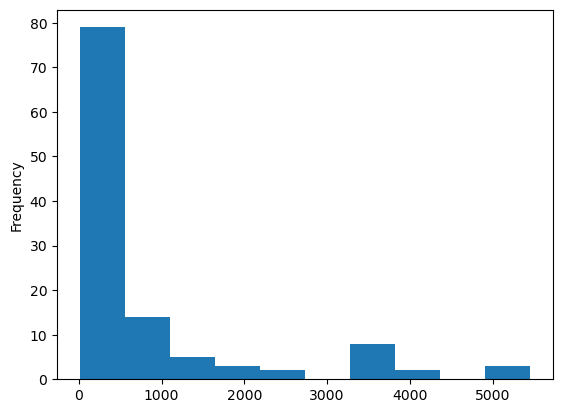

In [20]:
df_parole["Texte"].str.len().plot(kind="hist")

In [21]:
# Exclure les prises de parole de "Mme la présidente"
df_parole = df_parole[df_parole["Nom_orateur"].str.strip() != "Mme la présidente"]

In [22]:
df_parole.shape

(69, 25)

In [23]:
df_parole["Texte"].str.len().describe()

count      69.000000
mean     1254.739130
std      1455.763542
min        10.000000
25%       233.000000
50%       596.000000
75%      1693.000000
max      5456.000000
Name: Texte, dtype: float64

In [10]:
# df_full = pd.read_csv(
#     "assemblee_debat_meta_contexte.csv",
#     sep=",",
#     quoting=1,
#     encoding="utf-8",
#     # error_bad_lines=False,
#     engine="python",
# )

df_full = pd.read_csv("assemblee_debat_meta_contexte.csv")

In [63]:
df_full

,UID,SeanceRef,SessionRef,DateSeance,DateSeanceJour,NumSeanceJour,NumSeance,TypeAssemblee,Legislature,Session,...,Ordre_seance,Code_grammaire,Code_style,Code_parole,Role_debat,Nom_orateur,Qualite_orateur,ID_orateur,stime,Texte
0,CRSANR5L16S2024O1N220,RUANR5L16S2024IDS28385,SCR5A2024O1,20240530213000000,jeudi 30 mai 2024,3,220,AN,16,Session ordinaire 2023-2024,...,2,OUV_SEAN_2_1,NORMAL,NaN,president,Mme la présidente,NaN,719874.0,1063.52,La séance est ouverte.
1,CRSANR5L16S2024O1N220,RUANR5L16S2024IDS28385,SCR5A2024O1,20240530213000000,jeudi 30 mai 2024,3,220,AN,16,Session ordinaire 2023-2024,...,3,OUV_SEAN_2_2,Info Italiques,NaN,NaN,NaN,NaN,NaN,NaN,(La séance est ouverte à vingt et une heures t...
2,CRSANR5L16S2024O1N220,RUANR5L16S2024IDS28385,SCR5A2024O1,20240530213000000,jeudi 30 mai 2024,3,220,AN,16,Session ordinaire 2023-2024,...,7,ODJ_APPEL_DISCUSSION,NORMAL,NaN,president,Mme la présidente,NaN,719874.0,1067.56,L’ordre du jour appelle la suite de la discuss...
3,CRSANR5L16S2024O1N220,RUANR5L16S2024IDS28385,SCR5A2024O1,20240530213000000,jeudi 30 mai 2024,3,220,AN,16,Session ordinaire 2023-2024,...,9,PAROLE_GENERIQUE,NORMAL,NaN,NaN,Mme la présidente,NaN,719874.0,1075.52,La parole est à M. le ministre délégué chargé ...
4,CRSANR5L16S2024O1N220,RUANR5L16S2024IDS28385,SCR5A2024O1,20240530213000000,jeudi 30 mai 2024,3,220,AN,16,Session ordinaire 2023-2024,...,10,PAROLE_GENERIQUE,NORMAL,NaN,NaN,M. Frédéric Valletoux,ministre délégué chargé de la santé et de la p...,795350.0,1117.20,Le cancer touche chaque jour près de 1 200 per...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,CRSANR5L16S2024O1N220,RUANR5L16S2024IDS28385,SCR5A2024O1,20240530213000000,jeudi 30 mai 2024,3,220,AN,16,Session ordinaire 2023-2024,...,382,PAROLE_GENERIQUE,NORMAL,NaN,NaN,Mme Sandrine Rousseau,NaN,795076.0,9634.46,Les Écologistes accueillent avec enthousiasme ...
238,CRSANR5L16S2024O1N220,RUANR5L16S2024IDS28385,SCR5A2024O1,20240530213000000,jeudi 30 mai 2024,3,220,AN,16,Session ordinaire 2023-2024,...,387,FIN_SEAN_1_0,NORMAL,NaN,president,Mme la présidente,NaN,719874.0,9751.70,La suite de la discussion est renvoyée à une p...
239,CRSANR5L16S2024O1N220,RUANR5L16S2024IDS28385,SCR5A2024O1,20240530213000000,jeudi 30 mai 2024,3,220,AN,16,Session ordinaire 2023-2024,...,390,FIN_SEAN_2_1,NORMAL,NaN,president,Mme la présidente,NaN,719874.0,9830.78,"Prochaine séance, demain, à neuf heures : Suit..."
240,CRSANR5L16S2024O1N220,RUANR5L16S2024IDS28385,SCR5A2024O1,20240530213000000,jeudi 30 mai 2024,3,220,AN,16,Session ordinaire 2023-2024,...,391,FIN_SEAN_2_4,Info Italiques,NaN,NaN,NaN,NaN,NaN,NaN,(La séance est levée à minuit.)


In [11]:
df_full.shape

(242, 25)

In [12]:
df_full_parole = df_full[df_full["Code_grammaire"] == "PAROLE_GENERIQUE"]

In [13]:
df_full_parole.shape

(126, 25)

<Axes: ylabel='Frequency'>

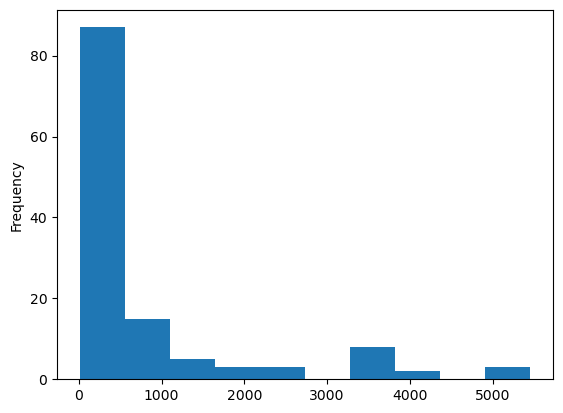

In [24]:
df_full_parole["Texte"].str.len().plot(kind="hist")

In [ ]:
# Exclure les prises de parole de "Mme la présidente"
df_full_parole = df_full_parole[
    df_full_parole["Nom_orateur"].str.strip() != "Mme la présidente"
]

In [27]:
df_full_parole.shape

(77, 25)

In [ ]:
df_parole["Texte"].str.len().describe()

count      69.000000
mean     1254.739130
std      1455.763542
min        10.000000
25%       233.000000
50%       596.000000
75%      1693.000000
max      5456.000000
Name: Texte, dtype: float64

In [28]:
df_full_parole["Texte"].str.len().describe()

count      77.000000
mean     1172.207792
std      1420.695255
min        10.000000
25%       188.000000
50%       573.000000
75%      1505.000000
max      5456.000000
Name: Texte, dtype: float64

In [ ]:
df_full_parole

In [ ]:
# Trouver les id_paragraphe présents dans l'un mais pas dans l'autre
ids_parole = set(df_parole["ID_paragraphe"])
ids_full_parole = set(df_full_parole["ID_paragraphe"])

ids_in_parole_not_in_full = ids_parole - ids_full_parole
ids_in_full_not_in_parole = ids_full_parole - ids_parole

# Afficher les lignes concernées pour analyse
diff_parole = df_parole[df_parole["ID_paragraphe"].isin(ids_in_parole_not_in_full)]
diff_full_parole = df_full_parole[
    df_full_parole["ID_paragraphe"].isin(ids_in_full_not_in_parole)
]

print("Dans df_parole mais pas dans df_full_parole :")
display(diff_parole)

print("Dans df_full_parole mais pas dans df_parole :")
display(diff_full_parole)

Dans df_parole mais pas dans df_full_parole :


,UID,SeanceRef,SessionRef,DateSeance,DateSeanceJour,NumSeanceJour,NumSeance,TypeAssemblee,Legislature,Session,...,Ordre_seance,Code_grammaire,Code_style,Code_parole,Role_debat,Nom_orateur,Qualite_orateur,ID_orateur,stime,Texte


Dans df_full_parole mais pas dans df_parole :


,UID,SeanceRef,SessionRef,DateSeance,DateSeanceJour,NumSeanceJour,NumSeance,TypeAssemblee,Legislature,Session,...,Ordre_seance,Code_grammaire,Code_style,Code_parole,Role_debat,Nom_orateur,Qualite_orateur,ID_orateur,stime,Texte
52,CRSANR5L16S2024O1N220,RUANR5L16S2024IDS28385,SCR5A2024O1,20240530213000000,jeudi 30 mai 2024,3,220,AN,16,Session ordinaire 2023-2024,...,115,PAROLE_GENERIQUE,NORMAL,NaN,NaN,M. Fabien Roussel,rapporteur de la commission des affaires sociales,720692.0,4748.55,Il est rédactionnel.
64,CRSANR5L16S2024O1N220,RUANR5L16S2024IDS28385,SCR5A2024O1,20240530213000000,jeudi 30 mai 2024,3,220,AN,16,Session ordinaire 2023-2024,...,132,PAROLE_GENERIQUE,NORMAL,NaN,NaN,M. Frédéric Valletoux,ministre délégué,795350.0,5062.52,Favorable.
85,CRSANR5L16S2024O1N220,RUANR5L16S2024IDS28385,SCR5A2024O1,20240530213000000,jeudi 30 mai 2024,3,220,AN,16,Session ordinaire 2023-2024,...,154,PAROLE_GENERIQUE,NORMAL,NaN,NaN,Mme Angélique Ranc,NaN,793230.0,5529.87,"Nausées, vomissements, céphalées, fatigue extr..."
91,CRSANR5L16S2024O1N220,RUANR5L16S2024IDS28385,SCR5A2024O1,20240530213000000,jeudi 30 mai 2024,3,220,AN,16,Session ordinaire 2023-2024,...,161,PAROLE_GENERIQUE,NORMAL,PAROLE_1_2,NaN,Mme Angélique Ranc,NaN,793230.0,5647.44,Je ne suis pas sûre de comprendre : il me semb...
93,CRSANR5L16S2024O1N220,RUANR5L16S2024IDS28385,SCR5A2024O1,20240530213000000,jeudi 30 mai 2024,3,220,AN,16,Session ordinaire 2023-2024,...,163,PAROLE_GENERIQUE,NORMAL,PAROLE_1_2,NaN,M. Frédéric Valletoux,ministre délégué,795350.0,5681.32,Je voulais dire que ce que vous demandez est d...
97,CRSANR5L16S2024O1N220,RUANR5L16S2024IDS28385,SCR5A2024O1,20240530213000000,jeudi 30 mai 2024,3,220,AN,16,Session ordinaire 2023-2024,...,169,PAROLE_GENERIQUE,NORMAL,PAROLE_1_2,NaN,M. Joël Aviragnet,NaN,642764.0,5706.12,Je le retire pour gagner du temps et ainsi per...
172,CRSANR5L16S2024O1N220,RUANR5L16S2024IDS28385,SCR5A2024O1,20240530213000000,jeudi 30 mai 2024,3,220,AN,16,Session ordinaire 2023-2024,...,249,PAROLE_GENERIQUE,NORMAL,NaN,NaN,M. Fabien Roussel,rapporteur,720692.0,7097.12,"J’y suis favorable à titre personnel, mais la ..."
233,CRSANR5L16S2024O1N220,RUANR5L16S2024IDS28385,SCR5A2024O1,20240530213000000,jeudi 30 mai 2024,3,220,AN,16,Session ordinaire 2023-2024,...,371,PAROLE_GENERIQUE,NORMAL,NaN,NaN,Mme Elsa Faucillon,NaN,721896.0,9230.65,Cette manière de légiférer a été largement doc...


In [30]:
diff_full_parole

,UID,SeanceRef,SessionRef,DateSeance,DateSeanceJour,NumSeanceJour,NumSeance,TypeAssemblee,Legislature,Session,...,Ordre_seance,Code_grammaire,Code_style,Code_parole,Role_debat,Nom_orateur,Qualite_orateur,ID_orateur,stime,Texte
52,CRSANR5L16S2024O1N220,RUANR5L16S2024IDS28385,SCR5A2024O1,20240530213000000,jeudi 30 mai 2024,3,220,AN,16,Session ordinaire 2023-2024,...,115,PAROLE_GENERIQUE,NORMAL,NaN,NaN,M. Fabien Roussel,rapporteur de la commission des affaires sociales,720692.0,4748.55,Il est rédactionnel.
64,CRSANR5L16S2024O1N220,RUANR5L16S2024IDS28385,SCR5A2024O1,20240530213000000,jeudi 30 mai 2024,3,220,AN,16,Session ordinaire 2023-2024,...,132,PAROLE_GENERIQUE,NORMAL,NaN,NaN,M. Frédéric Valletoux,ministre délégué,795350.0,5062.52,Favorable.
85,CRSANR5L16S2024O1N220,RUANR5L16S2024IDS28385,SCR5A2024O1,20240530213000000,jeudi 30 mai 2024,3,220,AN,16,Session ordinaire 2023-2024,...,154,PAROLE_GENERIQUE,NORMAL,NaN,NaN,Mme Angélique Ranc,NaN,793230.0,5529.87,"Nausées, vomissements, céphalées, fatigue extr..."
91,CRSANR5L16S2024O1N220,RUANR5L16S2024IDS28385,SCR5A2024O1,20240530213000000,jeudi 30 mai 2024,3,220,AN,16,Session ordinaire 2023-2024,...,161,PAROLE_GENERIQUE,NORMAL,PAROLE_1_2,NaN,Mme Angélique Ranc,NaN,793230.0,5647.44,Je ne suis pas sûre de comprendre : il me semb...
93,CRSANR5L16S2024O1N220,RUANR5L16S2024IDS28385,SCR5A2024O1,20240530213000000,jeudi 30 mai 2024,3,220,AN,16,Session ordinaire 2023-2024,...,163,PAROLE_GENERIQUE,NORMAL,PAROLE_1_2,NaN,M. Frédéric Valletoux,ministre délégué,795350.0,5681.32,Je voulais dire que ce que vous demandez est d...
97,CRSANR5L16S2024O1N220,RUANR5L16S2024IDS28385,SCR5A2024O1,20240530213000000,jeudi 30 mai 2024,3,220,AN,16,Session ordinaire 2023-2024,...,169,PAROLE_GENERIQUE,NORMAL,PAROLE_1_2,NaN,M. Joël Aviragnet,NaN,642764.0,5706.12,Je le retire pour gagner du temps et ainsi per...
172,CRSANR5L16S2024O1N220,RUANR5L16S2024IDS28385,SCR5A2024O1,20240530213000000,jeudi 30 mai 2024,3,220,AN,16,Session ordinaire 2023-2024,...,249,PAROLE_GENERIQUE,NORMAL,NaN,NaN,M. Fabien Roussel,rapporteur,720692.0,7097.12,"J’y suis favorable à titre personnel, mais la ..."
233,CRSANR5L16S2024O1N220,RUANR5L16S2024IDS28385,SCR5A2024O1,20240530213000000,jeudi 30 mai 2024,3,220,AN,16,Session ordinaire 2023-2024,...,371,PAROLE_GENERIQUE,NORMAL,NaN,NaN,Mme Elsa Faucillon,NaN,721896.0,9230.65,Cette manière de légiférer a été largement doc...


In [31]:
df_full.columns

Index(['UID', 'SeanceRef', 'SessionRef', 'DateSeance', 'DateSeanceJour',
       'NumSeanceJour', 'NumSeance', 'TypeAssemblee', 'Legislature', 'Session',
       'NomFichierJO', 'President', 'Titre_general', 'Sous_titre',
       'ID_paragraphe', 'Ordre_seance', 'Code_grammaire', 'Code_style',
       'Code_parole', 'Role_debat', 'Nom_orateur', 'Qualite_orateur',
       'ID_orateur', 'stime', 'Texte'],
      dtype='object')